# Simulation Algorithm:
<ol>
    <li>Assuming that missile position is $(x_m, z_m, y_m) = (0, 0, 0)$, and given $D_0$, $\varepsilon_0$, $\sigma_0$, target velocity $V_T$ and missile velocity $V_M$. Then, the initial target position can be determined using the following equations:
       $$
        x_t = D_0\; cos(\varepsilon_0)\; cos(\sigma_0)\\
        z_t = D_0\; cos(\varepsilon_0)\; sin(\sigma_0)\\
        y_t = D_0\; sin(\varepsilon_0)\\
       $$
        
   </li>
   <li>Instantiate two objects from the vehicle class. One represents the target vehicle and the second represents the missile.</li>
    <li>Based on the given $\delta t$ and the $t_f$, the simulation vectors are initialized with the needed size.</li>
<li>Loop over the given time period, and for every time step:
<ul>
    <li>Solve the relative velocity ordinary differential equations to get its three components in the spherical coordinates.
            $$
            \dot D = V_T\; cos(\sigma-\varphi_T)\; cos(\varepsilon-\theta_T)\; - \;V_M\; cos(\sigma-\varphi_M)\; cos(\varepsilon-\theta_M)$$
           $$D\; \dot \varepsilon = \;V_M\; cos(\sigma-\varphi_M)\; sin(\varepsilon-\theta_M)\;-\;V_T\; cos(\sigma-\varphi_T)\; sin(\varepsilon-\theta_T)$$
           $$D\; cos(\varepsilon)\; \dot \sigma = \;V_M\; sin(\sigma-\varphi_M)\; cos(\theta_M)\;-\;V_T\; sin(\sigma-\varphi_T)\; cos(\theta_T)\\
            $$
    </li>
<li>Those ordinary differential equations are solved using "Solver" function, which have two options to solve those ODEs either using Euler or Runge Kutta.</li>
<li>After solving the ODEs, the new values for $D$, $\varepsilon$ and $\sigma$ are estimated.</li>
<li>Then the missile velocity vector angles are updated using the Ideal Bond equations as follows:
<ol> 
<li>For Pure Pursuit: $\theta_M = \varepsilon$ and $\varphi_M = \sigma$.</li>
<li>For Deviated Pursuit: $\theta_M=\varepsilon-\varepsilon_P$ and $\varphi_M=\sigma-\sigma_P$.</li>
<li>For Porportional Navigation: $\dot \theta_M=k_1 \dot\varepsilon$ and $\dot \varphi_M=k_2\dot \sigma$.</li>
</ol>
</li>
    
<li>After solving the Ideal Bond equations, the new position of the missile can be estimated as follows:
$$V_M = constant\\$$
$$r = V_M\; \delta t\\$$
$$\theta_M = \theta_M + \delta \theta_M\\$$
$$\varphi_M = \varphi_M + \delta \varphi_M\\$$
$$x_M = x_M + r\; cos(\theta_M)\; cos(\varphi_M)\\$$
$$z_M = z_M + r \;cos(\theta_M) \;sin(\varphi_M)\\$$
$$y_M = y_M + r \;sin(\theta_M)\\$$
</li>
</ul>         
</li>
<li>When the loop finishes there will be two vectores that describe the full trajectory of both the target and missile.</li>
</ol>

# Vehicle Class Initialization

In [3]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import sin 
from numpy import cos
from math import atan, atan2, acos, asin
from math import radians
from math import sqrt, pi

class Vehicle:
    def __init__(self, v = 500, x = 0, z = 0, y = 0, theta = 0, phi = 0):
        self.position = []
        self.v = v
        self.theta = theta
        self.phi = phi
        self.x = x
        self.z = z
        self.y = y
        self.r = sqrt(self.x**2 + self.z**2 + self.y**2)
        self.dx = self.dz = self.dy = 0
        self.position.append([self.x, self.z, self.y])
    
    def update(self, dv, dtheta, dphi, dt):
        self.v += dv
        self.r = self.v * dt
        self.theta += dtheta
        self.phi += dphi
        self.dx = self.r * cos(self.theta) * cos(self.phi)
        self.dz = self.r * cos(self.theta) * sin(self.phi)
        self.dy = self.r * sin(self.theta)
        self.x += self.dx #if abs(self.dx) > (0.0001 * dt) else 0
        self.z += self.dz #if abs(self.dz) > (0.0001 * dt) else 0
        self.y += self.dy #if abs(self.dy) > (0.0001 * dt) else 0
        self.position.append([self.x, self.z, self.y])

# Simulation Class Initialization

In [378]:
class Simulation:
    def __init__(self, D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t):
        self.D0 = D0
        self.epsilon0 = epsilon0
        self.sigma0 = sigma0
        self.VT = VT
        self.VM = VM
        self.dt = dt
        self.tf = tf
        self.theta_t = theta_t
        self.phi_t = phi_t
        self.theta_m = self.epsilon0
        self.phi_m = self.sigma0
        
    def PlotTrajectories(self, target_position, missile_position, view = "3D", title = "Figure"):
        xt, zt, yt = zip(*target_position)
        xm, zm, ym = zip(*missile_position)
        if view == "3D":
            fig = plt.figure(figsize=(8, 8))
            fig.suptitle(title, fontsize=20)
            ax = Axes3D(fig)
            ax.set_xlabel('X axis', fontsize=16)
            ax.set_zlabel('Y axis', fontsize=16)
            ax.set_ylabel('Z axis', fontsize=16)
            ax.plot(xt, zt, yt, label='Target Trajectory')
            ax.plot(xm, zm, ym, label='Missile Trajectory')
            ax.scatter(xt[-1], zt[-1], yt[-1], c='r', marker='x')   # End point
            ax.scatter(xt[0], zt[0], yt[0], c='k', marker='*')   # Start point
            ax.scatter(xm[-1], zm[-1], ym[-1], c='r', marker='o')   # End point
            ax.scatter(xm[0], zm[0], ym[0], c='g', marker='s')   # Start point
            ax.legend()
            plt.grid()
            plt.show()
        elif view == "XY" or view == "YX":
            fig = plt.figure(figsize=(8, 8))
            fig.suptitle(title, fontsize=20)
            plt.xlabel('X axis', fontsize=16)
            plt.ylabel('Y axis', fontsize=16)
            plt.plot(xt, yt, label='Target Trajectory')
            plt.plot(xm, ym, label='Missile Trajectory')
            plt.scatter(xt[-1], yt[-1], c='r', marker='x')   # End point
            plt.scatter(xt[0], yt[0], c='k', marker='*')   # Start point
            plt.scatter(xm[-1], ym[-1], c='r', marker='o')   # End point
            plt.scatter(xm[0], ym[0], c='g', marker='s')   # Start point
            plt.legend()
            plt.grid()
            plt.show()
        elif view == "ZY" or view == "YZ":
            fig = plt.figure(figsize=(8, 8))
            fig.suptitle(title, fontsize=20)
            plt.xlabel('Z axis', fontsize=16)
            plt.ylabel('Y axis', fontsize=16)
            plt.plot(zt, yt, label='Target Trajectory')
            plt.plot(zm, ym, label='Missile Trajectory')
            plt.scatter(zt[-1], yt[-1], c='r', marker='x')   # End point
            plt.scatter(zt[0], yt[0], c='k', marker='*')   # Start point
            plt.scatter(zm[-1], ym[-1], c='r', marker='o')   # End point
            plt.scatter(zm[0], ym[0], c='g', marker='s')   # Start point
            plt.legend()
            plt.grid()
            plt.show()
        elif view == "XZ" or view == "ZX":
            fig = plt.figure(figsize=(8, 8))
            fig.suptitle(title, fontsize=20)
            plt.xlabel('X axis', fontsize=16)
            plt.ylabel('Z axis', fontsize=16)
            plt.plot(zt, xt, label='Target Trajectory')
            plt.plot(zm, xm, label='Missile Trajectory')
            plt.scatter(zt[-1], xt[-1], c='r', marker='x')   # End point
            plt.scatter(zt[0], xt[0], c='k', marker='*')   # Start point
            plt.scatter(zm[-1], xm[-1], c='r', marker='o')   # End point
            plt.scatter(zm[0], xm[0], c='g', marker='s')   # Start point
            plt.legend()
            plt.grid()
            plt.show()
    
    def subPlotTrajectories(self, target_position, missile_position, title = "Figure"):
        xt, zt, yt = zip(*target_position)
        xm, zm, ym = zip(*missile_position)
        fig = plt.figure(figsize=(20, 5))
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(hspace=0.2, wspace=0.2)
        plt.subplot(1, 3, 1)
        plt.xlabel('X axis', fontsize=10)
        plt.ylabel('Y axis', fontsize=10)
        plt.plot(xt, yt, label='Target Trajectory')
        plt.plot(xm, ym, label='Missile Trajectory')
        plt.legend()
        plt.grid()
        plt.subplot(1, 3, 2)
        plt.xlabel('Z axis', fontsize=10)
        plt.ylabel('Y axis', fontsize=10)
        plt.plot(zt, yt, label='Target Trajectory')
        plt.plot(zm, ym, label='Missile Trajectory')
        plt.legend()
        plt.grid()      
        plt.subplot(1, 3, 3)
        plt.xlabel('Z axis', fontsize=10)
        plt.ylabel('X axis', fontsize=10)
        plt.gca().invert_yaxis()
        plt.plot(zt, xt, label='Target Trajectory')
        plt.plot(zm, xm, label='Missile Trajectory')
        plt.legend()
        plt.grid()
            
    def PlotAccelerations(self, Jn_theta, Jn_phi, time, title = "Figure"):
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('Time (s)', fontsize=16)
        plt.ylabel('Acceleration (g)', fontsize=16)
        plt.plot(time, Jn_theta, label='Jn_theta')
        plt.plot(time, Jn_phi, label='Jn_phi')
        plt.legend()
        plt.grid()

    
    def simulation(self, G = 2, S = 1, manuver_target = True, plot = False):
        def interceptionScenarioInit():
            xt = self.D0 * cos(radians(self.epsilon0))*cos(radians(self.sigma0))
            zt = self.D0 * cos(radians(self.epsilon0))*sin(radians(self.sigma0))
            yt = self.D0 * sin(radians(self.epsilon0))
            target = Vehicle(v = self.VT, x = xt, z = zt, y = yt, theta = radians(self.theta_t), phi = radians(self.phi_t))
            missile = Vehicle(v = self.VM, x = 0, z = 0, y = 0, theta = radians(self.theta_m), phi = radians(self.phi_m))
            Guidance_Laws = ["Pure Pursuit", "Deviated Pursuit", "Porportional Navigation", "Constant Bearing"]
            Guidance_Law = Guidance_Laws[G]       
            Solvers = ["Euler", "Runge Kutta"]
            solver = Solvers[S]
            return target, missile, Guidance_Law, solver
            
        def vectorInit():
            def epsilon0_sigma0():
                AB = np.array(target.position) - np.array(missile.position)
                AB = AB[0]
                BC = np.array(target.position) - np.array(missile.position)
                BC[0][2] = 0
                BC = BC[0]
                CD = np.array(target.position) - np.array(missile.position)
                CD[0][1] = CD[0][2] = 0
                CD = CD[0]
                AB_mg = np.linalg.norm(AB)
                BC_mg = np.linalg.norm(BC)
                CD_mg = np.linalg.norm(CD)
                ABdotBC = np.dot(AB,BC)
                BCdotCD = np.dot(BC,CD)
                epsilon0 = acos(ABdotBC / (AB_mg * BC_mg))
                sigma0 = acos(BCdotCD / (CD_mg * BC_mg))
                return epsilon0, sigma0
            
            time = np.arange(0, self.tf, self.dt)
            D       = [None] * len(time)
            epsilon = [None] * len(time)
            thetam = [None] * len(time)
            Jn_theta = [None] * len(time)
            Jn_phi = [None] * len(time)
            thetam[0] = 0
            sigma   = [None] * len(time)
            D[0] = target.r - missile.r
            epsilon[0], sigma[0] = epsilon0_sigma0()
            Jn_theta[0] = 0
            Jn_phi[0] = 0
            return D, epsilon, sigma, thetam, time, Jn_theta, Jn_phi
        
        def targetMove(manuver_target = True):
            if manuver_target == True:
                maxdef = 5 * self.dt
                mindef = 1 * self.dt
                dtheta_t = radians(random.uniform(mindef, maxdef))
                dphi_t = radians(random.uniform(mindef, maxdef))
            else:
                dtheta_t = 0
                dphi_t = 0
                target.update(0, dtheta_t, dphi_t, self.dt)
                
        def Solver():
            def RungeKutta(f, y0):
                k1 = f(t0, y0)
                k2 = f(t0 + 0.5 * self.dt, y0 + 0.5 * k1)
                k3 = f(t0 + 0.5 * self.dt, y0 + 0.5 * k2)
                k4 = f(t0 + self.dt, y0 + k3)
                y = (k1 + k2 + k2 + k3 + k3 + k4) / 6
                return y
            
            def Euler(f, y0):
                return f(t0, y0)
            
            def D_dotf(t, D):
                delta_D = target.v * cos(sigma0-target.phi) * cos(epsilon0-target.theta) - missile.v * cos(sigma0-missile.phi) * cos(epsilon0-missile.theta)
                return delta_D
            
            def epsilon_dotf(t, epsilon_0):
                delta_epsilon = (missile.v * cos(sigma0-missile.phi) * sin(epsilon_0-missile.theta) - target.v * cos(sigma0-target.phi) * sin(epsilon_0-target.theta))/D0
                return delta_epsilon
            
            def sigma_dotf(t, sigma_0):
                delta_sigma = (missile.v * sin(sigma_0-missile.phi) * cos(missile.theta) - target.v * sin(sigma_0-target.phi) * cos(target.theta))/(D0*cos(epsilon0))
                return delta_sigma
            
            if solver == "Euler":
                D_d = Euler(D_dotf, D0)
                epsilon_d = Euler(epsilon_dotf, epsilon0)
                sigma_d = Euler(sigma_dotf, sigma0)
            elif solver == "Runge Kutta":
                D_d = RungeKutta(D_dotf, D0)
                epsilon_d = RungeKutta(epsilon_dotf, epsilon0)
                sigma_d = RungeKutta(sigma_dotf, sigma0)
            return D_d, epsilon_d, sigma_d
        
        def updateObservation():
            epsilon[i] = epsilon[i-1] + epsilon_d * self.dt
            sigma[i] = sigma[i-1] + sigma_d * self.dt
            D[i] = D[i-1] + D_d * self.dt
            
        def IdealBond():
            thetaM_old = missile.theta
            phiM_old = missile.phi
            # Missile gives new commands
            if Guidance_Law == "Pure Pursuit":
                thetaM_new = epsilon[i]
                phiM_new = sigma[i]
            elif Guidance_Law == "Deviated Pursuit":
                epsilon_p = 4
                sigma_p = 4
                epsilon_p = radians(epsilon_p)
                sigma_p = radians(sigma_p)
                thetaM_new = epsilon[i] - epsilon_p
                phiM_new = sigma[i] - sigma_p
            elif Guidance_Law == "Porportional Navigation":
                k1 = 4
                k2 = 1
                thetaM_new = thetaM_old + k1 * epsilon_d * self.dt
                phiM_new = phiM_old + k2 * sigma_d * self.dt
                #print("thetaM_new = ", thetaM_new, "  phiM_new = ", phiM_new)
            elif Guidance_Law == "Constant Bearing":
                epsilon[i] = epsilon[0]
                sigma[i] = sigma[0]
                
                thetaM_new = atan( (cos(sigma[i]-missile.phi)*sin(epsilon[i]) - target.v*(cos(target.theta)*cos(sigma[i]-target.phi)*sin(epsilon[i])-sin(target.theta)*cos(epsilon[i]))/(missile.v*cos(missile.theta))) / cos(epsilon[i]) )
                x = target.v*sin(sigma[i]-target.phi)*cos(target.theta)
                y = (missile.v*cos(missile.theta))
                if x > y:
                    print("Mistake")
                    print("x = ", x,"      y = ",y)
                    print(missile.theta,"    ", missile.phi,"\n")
                #else:
                    #print("x = ", x,"      y = ",y)
                    #print(missile.theta,"    ", missile.phi,"\n")
                
                phiM_new = sigma[i] - asin( target.v*sin(sigma[i]-target.phi)*cos(target.theta) / (missile.v*cos(missile.theta)) )
                
            dtheta_m = thetaM_new - thetaM_old
            dphi_m = phiM_new - phiM_old
            return dtheta_m, dphi_m
            
        target, missile, Guidance_Law, solver = interceptionScenarioInit()
        D, epsilon, sigma, thetam, time, Jn_theta, Jn_phi = vectorInit()
        missile.theta = epsilon[0]
        missflag = 0
        g = 9.182
        
        timeHit = None
        
        for i in range(1, len(time)):
            t0 = time[i-1]
            t1 = time[i]
            D0 = D[i-1]
            epsilon0 = epsilon[i-1]
            sigma0 = sigma[i-1] 
            targetMove(manuver_target)
            D_d, epsilon_d, sigma_d = Solver()
            #print(sigma_d)
            updateObservation()
            #print(D[i], " ",epsilon[i], " ",sigma[i])
            
            missDistance = 80
            if Guidance_Law == "Porportional Navigation":
                missDistance *= 0.5
            if abs(D[i]) < missDistance:
                timeHit = time[i]
                print("Missile hit the target using ", Guidance_Law," after ", timeHit," seconds")
                break
            elif D[i] > D[i-1]:
                missflag = missflag + 1
                if missflag == 2:
                    print("Missile missed the target")
                    break
                else:
                    missflag = 0
            
            dtheta_m, dphi_m = IdealBond()
            missile.update(0, dtheta_m, dphi_m, self.dt)
            thetam[i] = missile.theta
            Jn_theta[i] = missile.v * dtheta_m / g
            Jn_phi[i] = missile.v * dphi_m * cos(thetam[i]) / g
            
        if plot == True:
            self.PlotTrajectories(target.position, missile.position, "3D", "3D Trajectory")
            self.subPlotTrajectories(target.position, missile.position, "2D Side Trajectories")
            self.PlotAccelerations(Jn_theta, Jn_phi, time, title = "Normal Accelerations vs Time")
        return target.position, missile.position, timeHit, Jn_theta, Jn_phi, time

# Case Study Conditions

In [379]:
D0 = 100000
epsilon0 = 50
sigma0 = 50
VT = 600
VM = 800
dt = 0.01
tf = 1000
theta_t = 0
phi_t = 0
S = 1
manuver_target = False


Missile hit the target using  Pure Pursuit  after  374.02  seconds


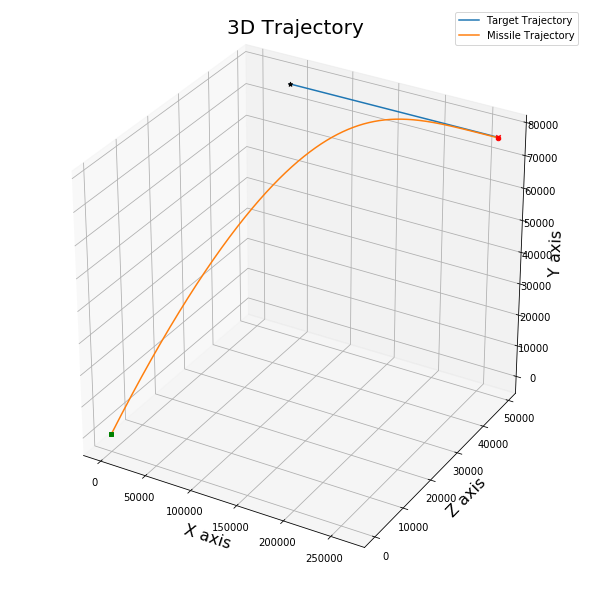

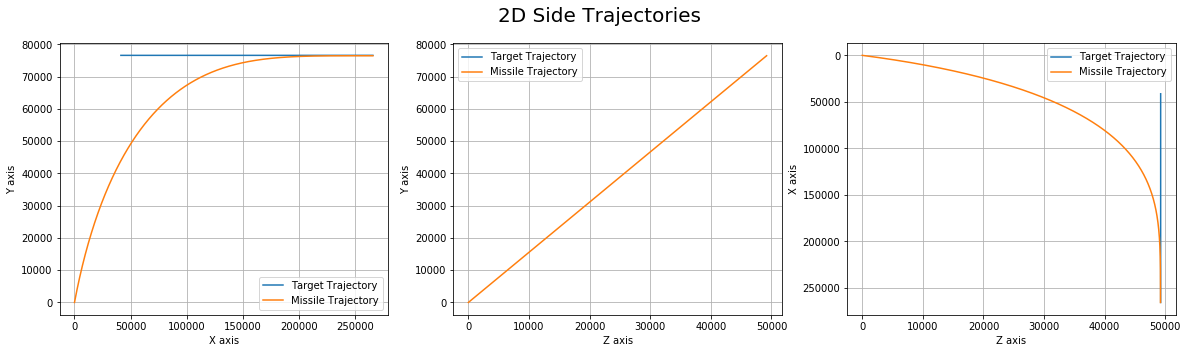

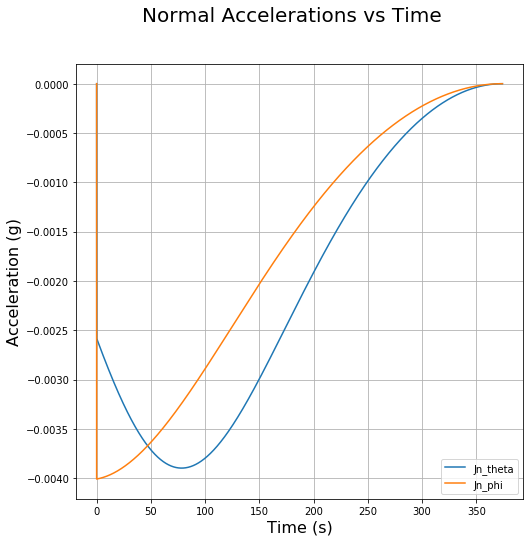

In [380]:
G = 0
caseGeneral = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target, missile, t, Jtheta, Jphi, time = caseGeneral.simulation(G, S, manuver_target, plot = True)

Missile hit the target using  Deviated Pursuit  after  358.03000000000003  seconds


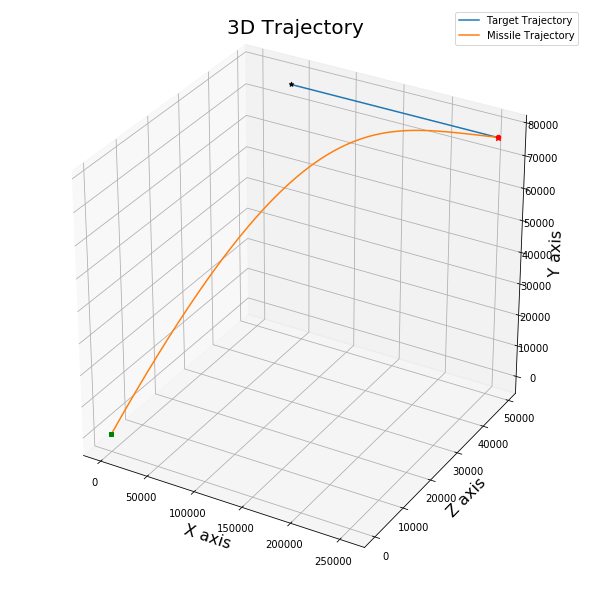

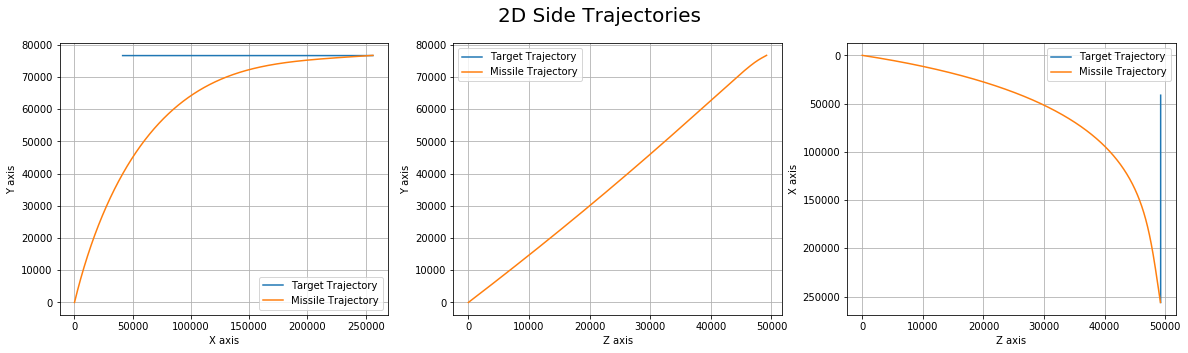

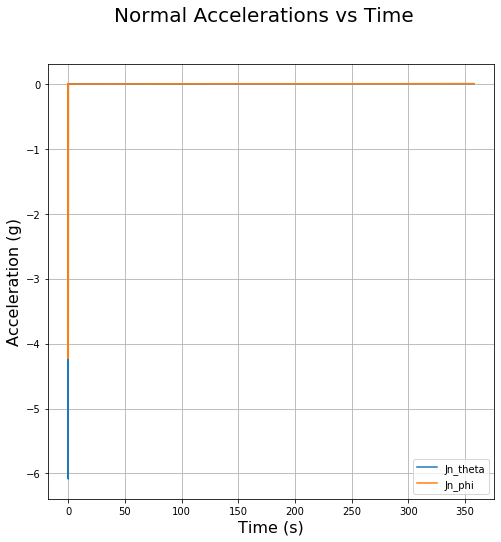

In [381]:
G = 1
caseGeneral = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target, missile, t, Jtheta, Jphi, time = caseGeneral.simulation(G, S, manuver_target, plot = True)

In [ ]:
G = 2
caseGeneral = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target, missile, t, Jtheta, Jphi, time = caseGeneral.simulation(G, S, manuver_target, plot = True)

Missile hit the target using  Constant Bearing  after  300.07  seconds


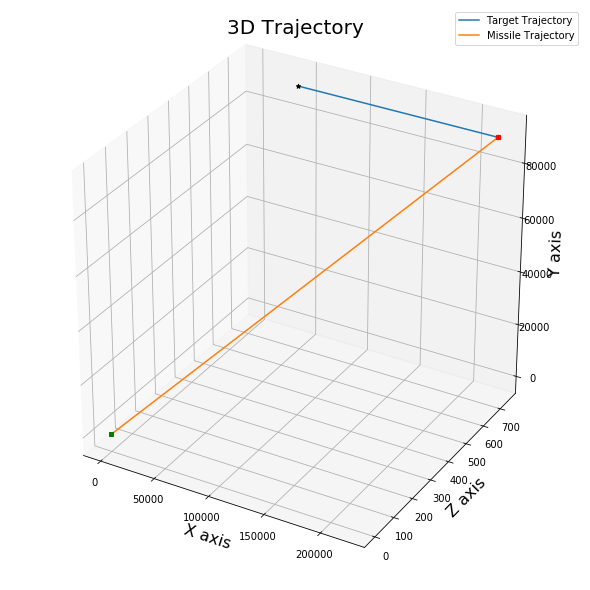

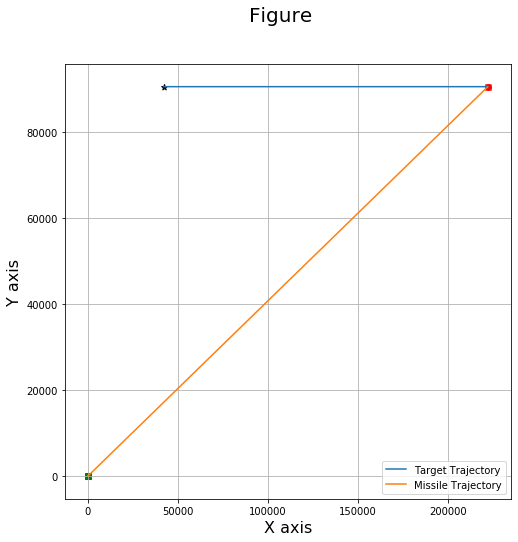

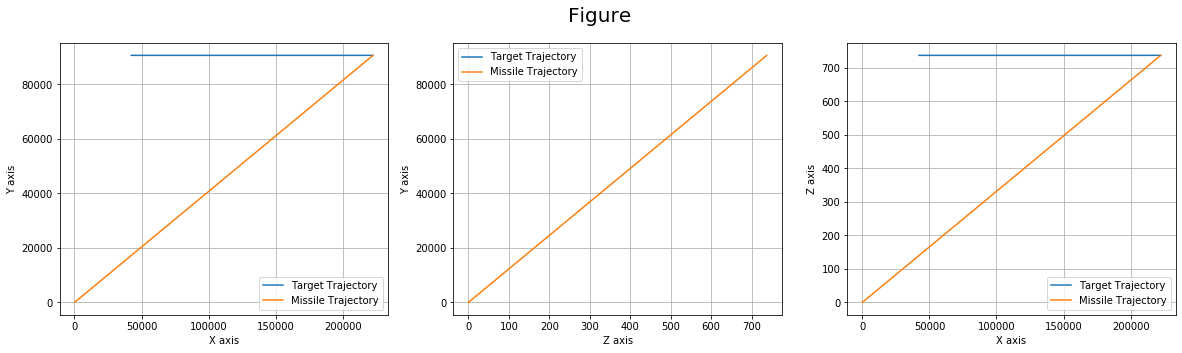

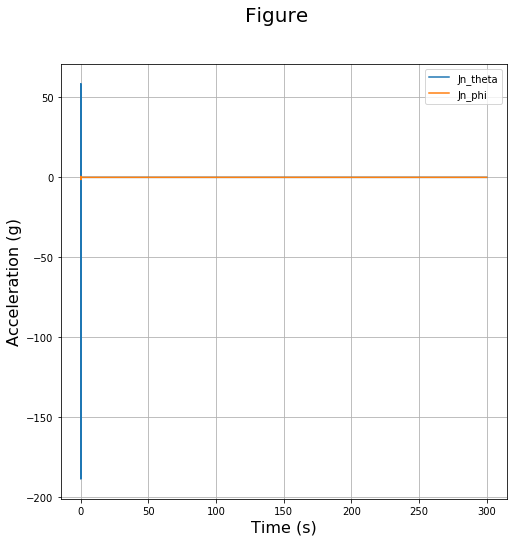

In [446]:
D0 = 100000
epsilon0 = 65
sigma0 = 1
VT = 600
VM = 800
dt = 0.01
tf = 1000
theta_t = 0
phi_t = 0
S = 1
manuver_target = False

G = 3
caseGeneral = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target, missile, t, Jtheta, Jphi, time = caseGeneral.simulation(G, S, manuver_target, plot = True)
caseGeneral.PlotTrajectories(target, missile, view = "XY", title = "Figure")
caseGeneral.subPlotTrajectories(target, missile, title = "Figure")
caseGeneral.PlotAccelerations(Jtheta, Jphi, time, title = "Figure")

# Compare Guidance Laws

In [264]:
def PlotComparisons(target_position, missile_position0, missile_position1, missile_position2, view = "3D", title = "Figure"):
    xt, zt, yt = zip(*target_position)
    xm0, zm0, ym0 = zip(*missile_position0)
    xm1, zm1, ym1 = zip(*missile_position1)
    xm2, zm2, ym2 = zip(*missile_position2)

    if view == "3D":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        ax = Axes3D(fig)
        #ax.set_xlim3d(-5000, 80000)
        #ax.set_ylim3d(-5000, 80000)
        #ax.set_zlim3d(-5000, 80000)
        ax.set_xlabel('X axis', fontsize=16)
        ax.set_zlabel('Y axis', fontsize=16)
        ax.set_ylabel('Z axis', fontsize=16)

        ax.plot(xt, zt, yt, label='Target Trajectory')
        ax.plot(xm0, zm0, ym0, label='Pure Pursuit')
        ax.plot(xm1, zm1, ym1, label='Deviated Pursuit')
        ax.plot(xm2, zm2, ym2, label='Porportional Navigation')
        
        ax.scatter(xt[-1], zt[-1], yt[-1], c='r', marker='x')   # End point
        ax.scatter(xt[0], zt[0], yt[0], c='k', marker='*')   # Start point
        
        ax.scatter(xm0[-1], zm0[-1], ym0[-1], c='r', marker='o')   # End point
        ax.scatter(xm0[0], zm0[0], ym0[0], c='g', marker='s')   # Start point
        ax.scatter(xm1[-1], zm1[-1], ym1[-1], c='r', marker='o')   # End point
        ax.scatter(xm1[0], zm1[0], ym1[0], c='g', marker='s')   # Start point
        ax.scatter(xm2[-1], zm2[-1], ym2[-1], c='r', marker='o')   # End point
        ax.scatter(xm2[0], zm2[0], ym2[0], c='g', marker='s')   # Start point
        ax.legend()
        plt.grid()
        plt.show()
    elif view == "XY" or view == "YX":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('X axis', fontsize=16)
        plt.ylabel('Y axis', fontsize=16)
        
        plt.plot(xt, yt, label='Target Trajectory')
        plt.plot(xm0, ym0, label='Pure Pursuit')
        plt.plot(xm1, ym1, label='Deviated Pursuit')
        plt.plot(xm2, ym2, label='Porportional Navigation')
        
        plt.scatter(xt[-1], yt[-1], c='r', marker='x')   # End point
        plt.scatter(xt[0], yt[0], c='k', marker='*')   # Start point
        
        plt.scatter(xm0[-1], ym0[-1], c='r', marker='o')   # End point
        plt.scatter(xm0[0], ym0[0], c='g', marker='s')   # Start point
        plt.scatter(xm1[-1], ym1[-1], c='r', marker='o')   # End point
        plt.scatter(xm1[0], ym1[0], c='g', marker='s')   # Start point
        plt.scatter(xm2[-1], ym2[-1], c='r', marker='o')   # End point
        plt.scatter(xm2[0], ym2[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()
    elif view == "ZY" or view == "YZ":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('Z axis', fontsize=16)
        plt.ylabel('Y axis', fontsize=16)
        plt.plot(zt, yt, label='Target Trajectory')
        plt.plot(zm0, ym0, label='Pure Pursuit')
        plt.plot(zm1, ym1, label='Deviated Pursuit')
        plt.plot(zm2, ym2, label='Porportional Navigation')
        
        plt.scatter(zt[-1], yt[-1], c='r', marker='x')   # End point
        plt.scatter(zt[0], yt[0], c='k', marker='*')   # Start point
        
        plt.scatter(zm0[-1], ym0[-1], c='r', marker='o')   # End point
        plt.scatter(zm0[0], ym0[0], c='g', marker='s')   # Start point
        plt.scatter(zm1[-1], ym1[-1], c='r', marker='o')   # End point
        plt.scatter(zm1[0], ym1[0], c='g', marker='s')   # Start point
        plt.scatter(zm2[-1], ym2[-1], c='r', marker='o')   # End point
        plt.scatter(zm2[0], ym2[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()
    elif view == "XZ" or view == "ZX":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('X axis', fontsize=16)
        plt.ylabel('Z axis', fontsize=16)
        plt.plot(xt, zt, label='Target Trajectory')
        plt.plot(xm0, zm0, label='Pure Pursuit')
        plt.plot(xm1, zm1, label='Deviated Pursuit')
        plt.plot(xm2, zm2, label='Porportional Navigation')
        
        plt.scatter(xt[-1], zt[-1], c='r', marker='x')   # End point
        plt.scatter(xt[0], zt[0], c='k', marker='*')   # Start point
        
        plt.scatter(xm0[-1], zm0[-1], c='r', marker='o')   # End point
        plt.scatter(xm0[0], zm0[0], c='g', marker='s')   # Start point
        plt.scatter(xm1[-1], zm1[-1], c='r', marker='o')   # End point
        plt.scatter(xm1[0], zm1[0], c='g', marker='s')   # Start point
        plt.scatter(xm2[-1], zm2[-1], c='r', marker='o')   # End point
        plt.scatter(xm2[0], zm2[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()

# Case 1: Incoming Non-Manuvering Target

In [127]:
theta_t = 180
case1 = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target0, missile0, t0, Jtheta0, Jphi0 = case1.simulation(G = 0, S = 1, manuver_target = False, plot = False)
target1, missile1, t1, Jtheta1, Jphi1 = case1.simulation(G = 1, S = 1, manuver_target = False, plot = False)
target2, missile2, t2, Jtheta2, Jphi2 = case1.simulation(G = 2, S = 1, manuver_target = False, plot = False)
target3, missile3, t3, Jtheta3, Jphi3 = case1.simulation(G = 3, S = 1, manuver_target = False, plot = False)

Missile hit the target using  Pure Pursuit  after  151.0  seconds
Missile hit the target using  Deviated Pursuit  after  155.70000000000002  seconds
Missile hit the target using  Porportional Navigation  after  121.8  seconds
Missile hit the target using  Constant Bearing  after  129.82  seconds


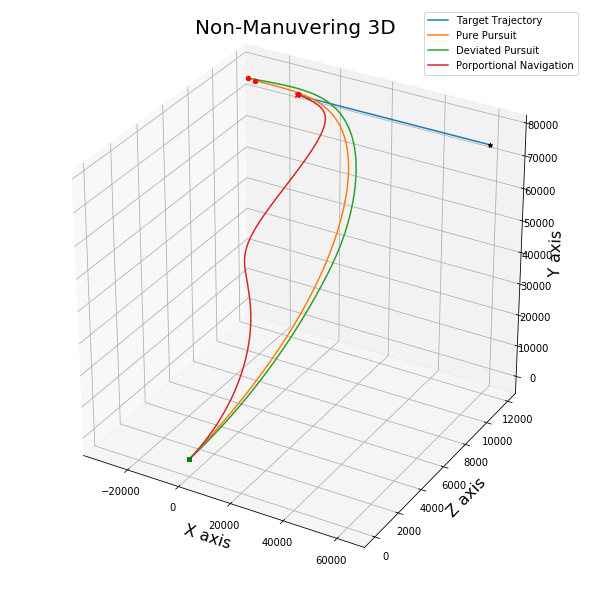

In [132]:
PlotComparisons(target2, missile0, missile1, missile2, view = "3D", title = "Non-Manuvering 3D")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


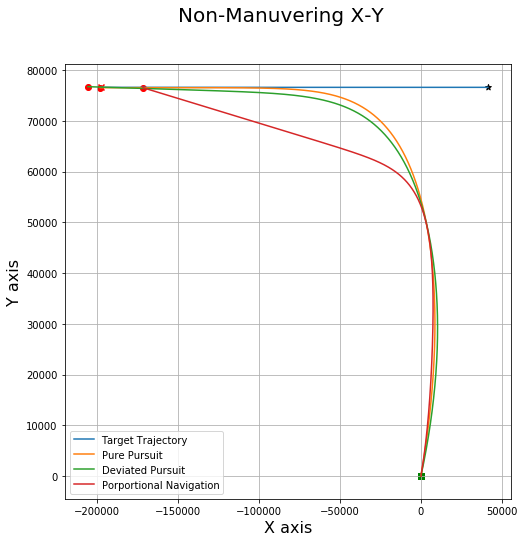

In [397]:
PlotComparisons(target0, missile0, missile1, missile2, view = "XY", title = "Non-Manuvering X-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


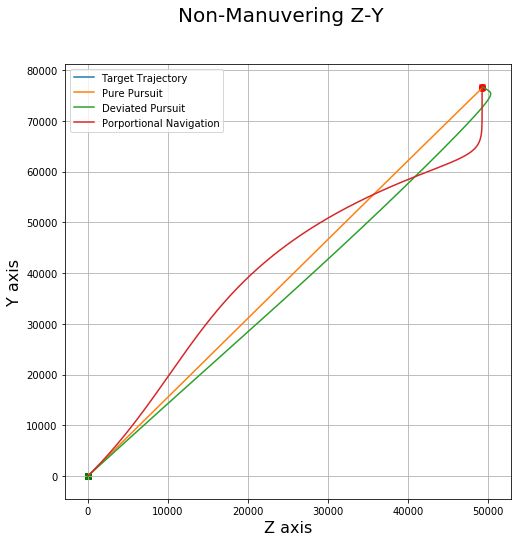

In [398]:
PlotComparisons(target2, missile0, missile1, missile2, view = "ZY", title = "Non-Manuvering Z-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


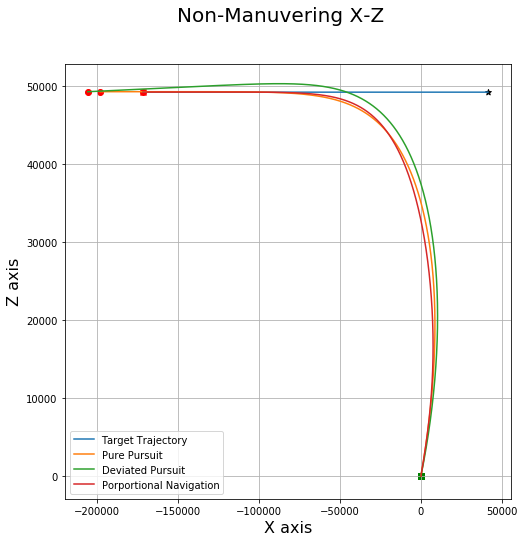

In [399]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XZ", title = "Non-Manuvering X-Z")

# Case 2: Outgoing Non-Manuvering Target

In [126]:
theta_t = 0
case2 = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target0, missile0, t0, Jtheta0, Jphi0 = case2.simulation(G = 0, S = 1, manuver_target = False, plot = False)
target1, missile1, t1, Jtheta1, Jphi1 = case2.simulation(G = 1, S = 1, manuver_target = False, plot = False)
target2, missile2, t2, Jtheta2, Jphi2 = case2.simulation(G = 2, S = 1, manuver_target = False, plot = False)
target3, missile3, t3, Jtheta3, Jphi3 = case1.simulation(G = 3, S = 1, manuver_target = False, plot = False)

Missile hit the target using  Pure Pursuit  after  421.28000000000003  seconds
Missile hit the target using  Deviated Pursuit  after  409.58  seconds
Missile hit the target using  Porportional Navigation  after  381.59000000000003  seconds


ValueError: math domain error

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


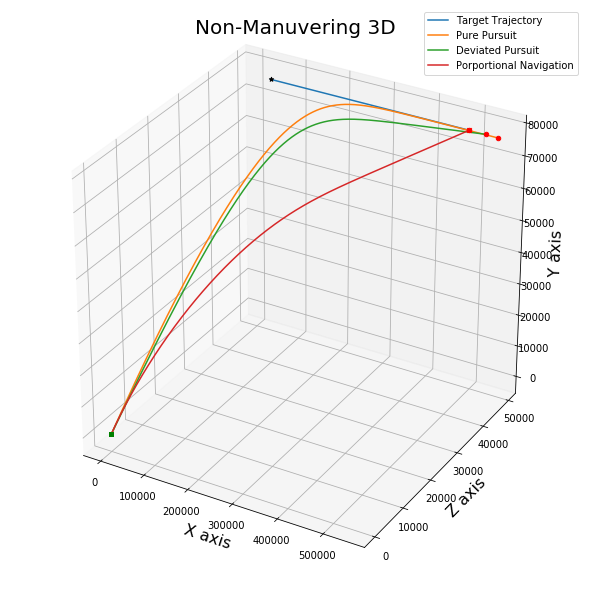

In [401]:
PlotComparisons(target2, missile0, missile1, missile2, view = "3D", title = "Non-Manuvering 3D")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


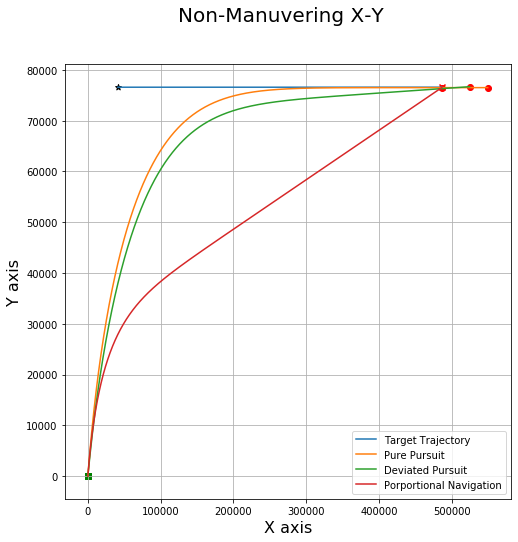

In [402]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XY", title = "Non-Manuvering X-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


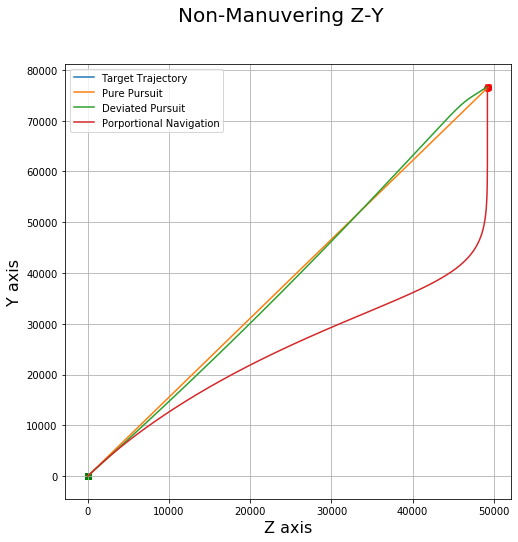

In [403]:
PlotComparisons(target2, missile0, missile1, missile2, view = "ZY", title = "Non-Manuvering Z-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


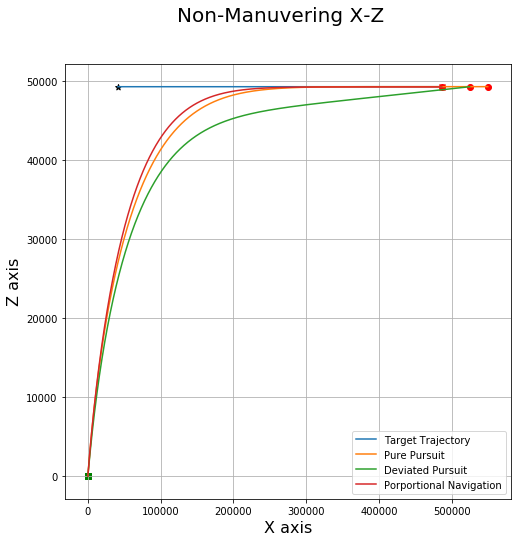

In [404]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XZ", title = "Non-Manuvering X-Z")

# Case 3: Incoming Manuvering Target

In [405]:
theta_t = 180
case3 = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target0, missile0, t0, Jtheta0, Jphi0 = case3.simulation(G = 0, S = 0, manuver_target = True, plot = False)
target1, missile1, t1, Jtheta1, Jphi1 = case3.simulation(G = 1, S = 0, manuver_target = True, plot = False)
target2, missile2, t2, Jtheta2, Jphi2 = case3.simulation(G = 2, S = 0, manuver_target = True, plot = False)

Missile hit the target using  Pure Pursuit  after  76.022  seconds
Missile hit the target using  Deviated Pursuit  after  86.077  seconds
Missile hit the target using  Porportional Navigation  after  76.078  seconds


/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


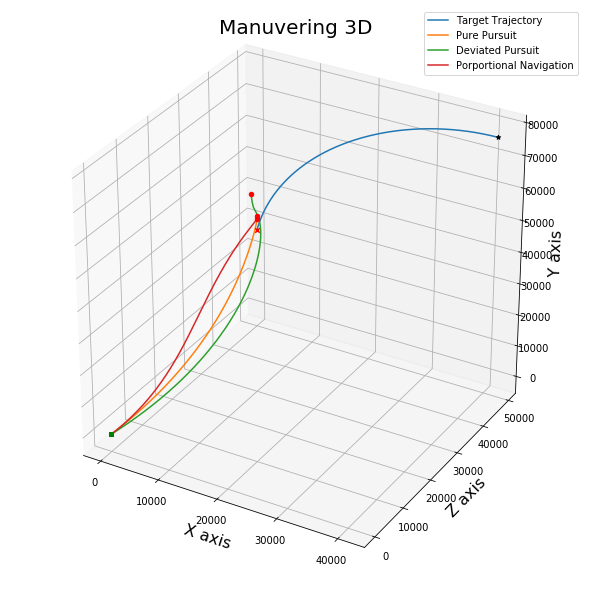

In [406]:
PlotComparisons(target2, missile0, missile1, missile2, view = "3D", title = "Manuvering 3D")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


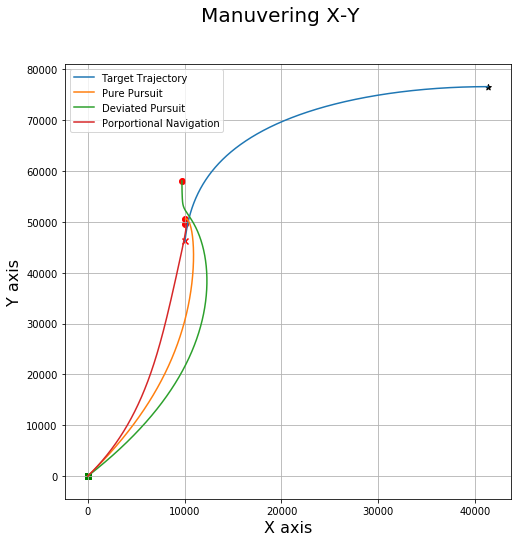

In [407]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XY", title = "Manuvering X-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


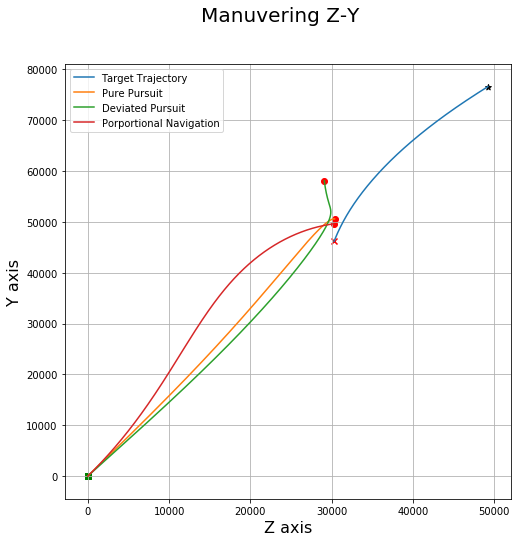

In [408]:
PlotComparisons(target2, missile0, missile1, missile2, view = "ZY", title = "Manuvering Z-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


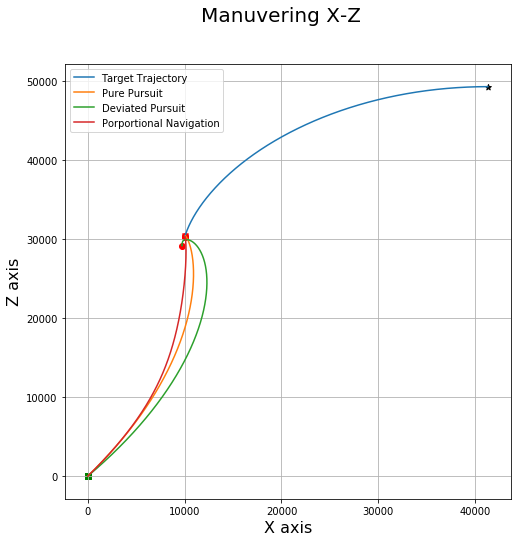

In [409]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XZ", title = "Manuvering X-Z")

# Case 4: Outgoing Manuvering Target

In [410]:
theta_t = 0
case4 = Simulation(D0, epsilon0, sigma0, VT, VM, dt, tf, theta_t, phi_t)
target0, missile0, t0, Jtheta0, Jphi0 = case4.simulation(G = 0, S = 0, manuver_target = True, plot = False)
target1, missile1, t1, Jtheta1, Jphi1 = case4.simulation(G = 1, S = 0, manuver_target = True, plot = False)
target2, missile2, t2, Jtheta2, Jphi2 = case4.simulation(G = 2, S = 0, manuver_target = True, plot = False)

Missile hit the target using  Pure Pursuit  after  284.225  seconds
Missile hit the target using  Deviated Pursuit  after  288.324  seconds
Missile hit the target using  Porportional Navigation  after  294.281  seconds


/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


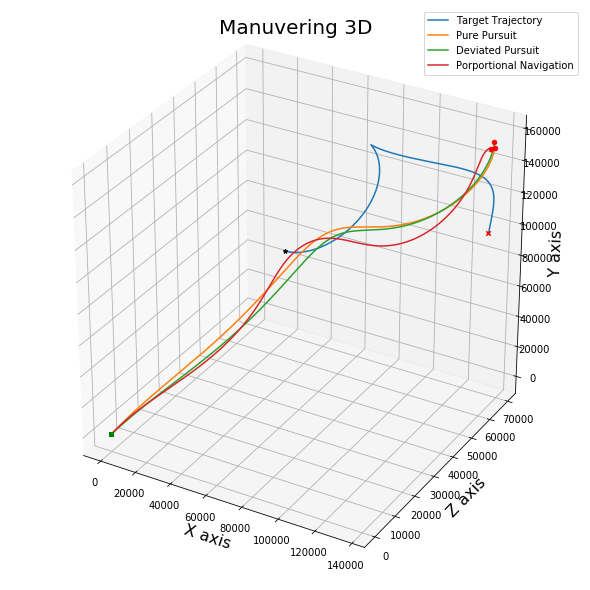

In [411]:
PlotComparisons(target2, missile0, missile1, missile2, view = "3D", title = "Manuvering 3D")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


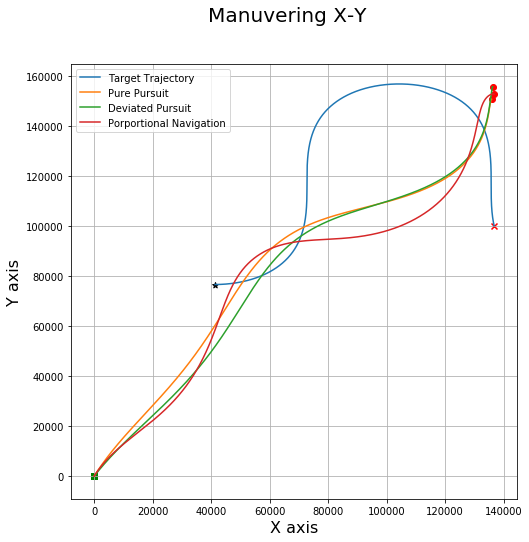

In [412]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XY", title = "Manuvering X-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


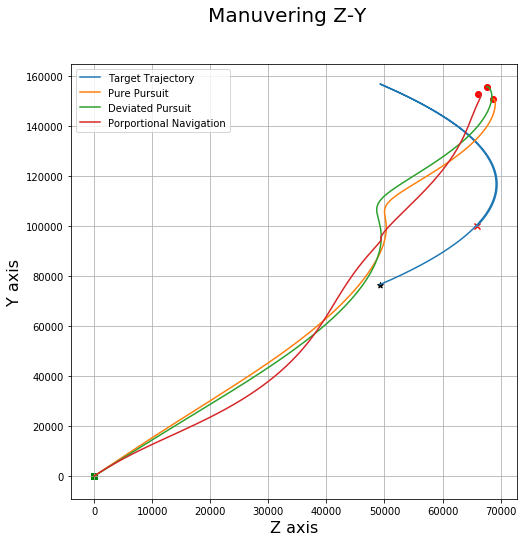

In [413]:
PlotComparisons(target2, missile0, missile1, missile2, view = "ZY", title = "Manuvering Z-Y")

/home/abdelrahman350/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


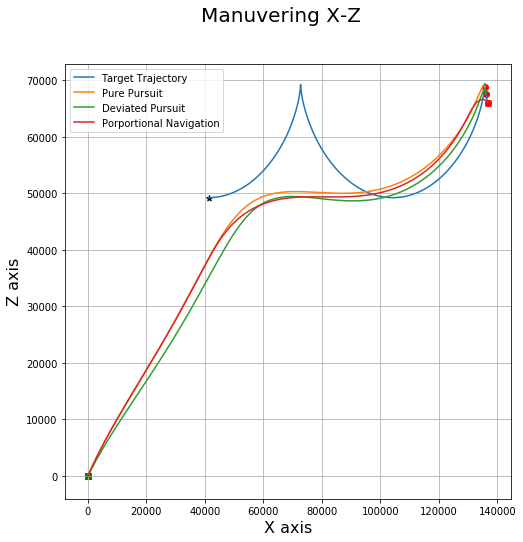

In [414]:
PlotComparisons(target2, missile0, missile1, missile2, view = "XZ", title = "Manuvering X-Z")

# Conclusion:
<ol>
<li>As noticed from the previous case studies, the missile that uses Porportional Navigation is able to intercept the target faster than its counterparts.
<li>Also, the missile that uses Porportional Navigation, the ideal bond works as D controller in PID, this is because the ideal bond equation makes the missile able to estimate the future trajectory of the target based on its current rate of change. This also reduce the need to do manuvers and makes the missile follow straight path more than its counterparts.
<li>Porportional Navigation guidance law makes use of the characteristics of homming radar on the missile, exploiting the doppler effect of the radar to measure the velocity and radial velocity, and makes an opportunity for improvement using filtering algorithms.
<li>Furthermore, it has been noticed that Pure Pursuit tends to be more accurate in the pursuit than Porportional navigation but it needs longer intercept distance than Porportional Navigation. So, if the intercept distance was small, the Pure Pursuit would be very likely to miss the target while the Porportional Navigation would succeed.
<ol>

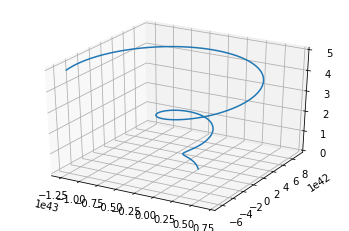

100000
100000


In [41]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

a=0.5
b=0.20
th=np.linspace(485, 500, len(time))
x=a*np.exp(b*th)*np.cos(th)
y=a*np.exp(b*th)*np.sin(th)
z = np.linspace(0,5, len(th))
ax.plot(x, y, z)
#ax.legend()

plt.show()
print(len(time))
print(len(x))

No handles with labels found to put in legend.


[68.453044 68.461638 68.470233 68.478827]
[89.999981 89.999981 89.999981 89.999981] 

[2.45760608e+41 2.45674614e+41 2.45588609e+41 2.45502593e+41]
[6.22403951e+41 6.22459483e+41 6.22515002e+41 6.22570511e+41]
[0.000000e+00 5.000050e-05 1.000010e-04 1.500015e-04] 

[6.69167360e+41 6.69187435e+41 6.69207511e+41 6.69227588e+41]
[1.194731   1.19488099 1.19503101 1.195181  ]
[1.570796 1.570796 1.570796 1.570796] 

[2.45760824e+41 2.45674834e+41 2.45588823e+41 2.45502812e+41]
[6.22403866e+41 6.22459396e+41 6.22514918e+41 6.22570425e+41]
[2.21904300e+35 2.21910957e+35 2.21917614e+35 2.21924272e+35] 



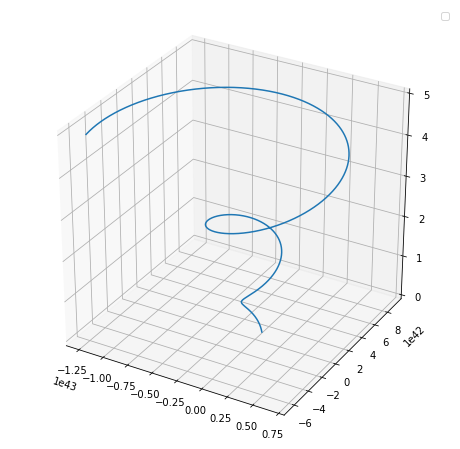

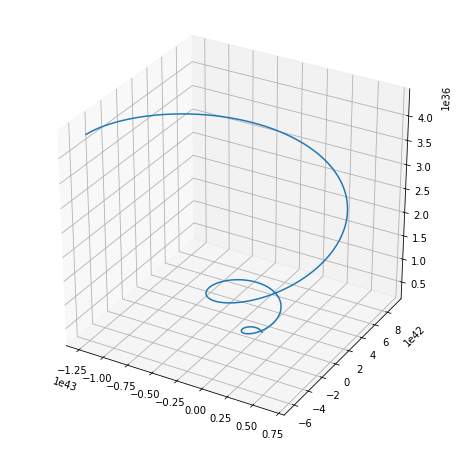

In [81]:
xx = []
yy = []
zz = []
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
a=0.5
b=0.20
th=np.linspace(485, 500, len(time))
x=a*np.exp(b*th)*np.cos(th)
y=a*np.exp(b*th)*np.sin(th)
z = np.linspace(0,5, len(th))
ax.plot(x, y, z)
ax.legend()


fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
r = np.sqrt(x**2+y**2+z**2)
theta = np.arctan2(y,x)
phi = np.arctan2(np.sqrt(x**2+y**2),z)
theta = np.round(theta,6)
phi = np.round(phi,6)
theta = theta * 180 / pi
phi = phi * 180/pi
theta = np.round(theta,6)
phi = np.round(phi,6)
print(theta[0:4])
print(phi[0:4],"\n")
theta = theta * pi / 180
phi = phi * pi / 180

xx = r * sin(phi)*cos(theta)
yy = r * sin(phi)*sin(theta)
zz = r * cos(phi)
#self.dx = self.r * cos(self.theta) * cos(self.phi)
#        self.dz = self.r * cos(self.theta) * sin(self.phi)
#        self.dy = self.r * sin(self.theta)

ax.plot(xx, yy, zz)
#ax.legend()
print(x[0:4])
print(y[0:4])
print(z[0:4],"\n")

print(r[0:4])
print(theta[0:4])
print(phi[0:4],"\n")

print(xx[0:4])
print(yy[0:4])
print(zz[0:4],"\n")

plt.show()

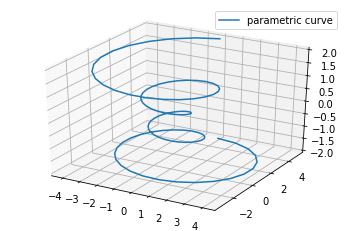

In [48]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()


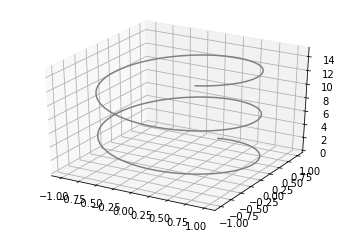

In [52]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')


In [452]:
x = -8026.399354067921 % 1
acos(x)

0.9264875581974261

In [102]:
mu, sigma = 0.2, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 1)
print(s)

[4.16946541]
